# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025 - 2**<br>

# <h1><center>Tablas de notas de enseñanza media </center></h1>

**Integrantes del Proyecto:** Constanza Alarcón, Carla Espinoza, Gaspar Galaz, Renato Reyes.

**Nombre del Profesor**: Rodrigo A. Carrasco.

**Fecha de Segunda Entrega**: 21 de octubre de 2025.

### Librerias

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import geopandas as gpd

**Lectura de archivos**

In [3]:
df24 = pd.read_csv(os.path.join("Datos_rendimiento", "20250212_Rendimiento_2024_20250131_WEB.csv"), encoding="utf-8", sep=";")
df23 = pd.read_csv(os.path.join("Datos_rendimiento", "20240209_Rendimiento_2023_20240131_WEB.csv"), encoding="utf-8", sep=";")
df22 = pd.read_csv(os.path.join("Datos_rendimiento", "20230209_Rendimiento_2022_20230131_WEB.csv"), encoding="utf-8", sep=";")
df21 = pd.read_csv(os.path.join("Datos_rendimiento", "20220302_Rendimiento_2021_20220131_WEB.csv"), encoding="utf-8", sep=";")
df20 = pd.read_csv(os.path.join("Datos_rendimiento", "20210223_Rendimiento_2020_20210131_WEB.csv"), encoding="utf-8", sep=";")
df19 = pd.read_csv(os.path.join("Datos_rendimiento", "20200220_Rendimiento_2019_20200131_PUBL.csv"), encoding="utf-8", sep=";")
df18 = pd.read_csv(os.path.join("Datos_rendimiento", "20190220_Rendimiento_2018_20190131_PUBL.csv"), encoding="utf-8", sep=";")
df17 = pd.read_csv(os.path.join("Datos_rendimiento", "20180213_Rendimiento_2017_20180131_PUBL.csv"), encoding="utf-8", sep=";")
df16 = pd.read_csv(os.path.join("Datos_rendimiento", "20170216_Rendimiento_2016_20170131_PUBL.csv"), encoding="utf-8", sep=";")




C:\Users\renat\AppData\Local\Temp\ipykernel_18676\341553399.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df24 = pd.read_csv(os.path.join("Datos_rendimiento", "20250212_Rendimiento_2024_20250131_WEB.csv"), encoding="utf-8", sep=";")
C:\Users\renat\AppData\Local\Temp\ipykernel_18676\341553399.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df23 = pd.read_csv(os.path.join("Datos_rendimiento", "20240209_Rendimiento_2023_20240131_WEB.csv"), encoding="utf-8", sep=";")
C:\Users\renat\AppData\Local\Temp\ipykernel_18676\341553399.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df22 = pd.read_csv(os.path.join("Datos_rendimiento", "20230209_Rendimiento_2022_20230131_WEB.csv"), encoding="utf-8", sep=";")
C:\Users\renat\AppData\Local\Temp\ipykernel_18676\341553399.py:4: DtypeWarning: Columns (25) have mixed types. S

**Limpieza y filtrado de datos**

In [4]:
df24["PROM_GRAL"] = df24["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df24_limpio = df24[df24["PROM_GRAL"] != 0]
df24_e_media = df24_limpio[df24_limpio["COD_ENSE2"] == 5]

df23["PROM_GRAL"] = df23["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df23_limpio = df23[df23["PROM_GRAL"] != 0]
df23_e_media = df23_limpio[df23_limpio["COD_ENSE2"] == 5]

df22["PROM_GRAL"] = df22["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df22_limpio = df22[df22["PROM_GRAL"] != 0]
df22_e_media = df22_limpio[df22_limpio["COD_ENSE2"] == 5]

df21["PROM_GRAL"] = df21["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df21_limpio = df21[df21["PROM_GRAL"] != 0]
df21_e_media = df21_limpio[df21_limpio["COD_ENSE2"] == 5]

df20["PROM_GRAL"] = df20["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df20_limpio = df20[df20["PROM_GRAL"] != 0]
df20_e_media = df20_limpio[df20_limpio["COD_ENSE2"] == 5]

df19["PROM_GRAL"] = df19["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df19_limpio = df19[df19["PROM_GRAL"] != 0]
df19_e_media = df19_limpio[df19_limpio["COD_ENSE2"] == 5]

df18["PROM_GRAL"] = df18["PROM_GRAL"].str.replace(",", ".", regex=False).str.strip().astype("float")
df18_limpio = df18[df18["PROM_GRAL"] != 0]
df18_e_media = df18_limpio[df18_limpio["COD_ENSE2"] == 5]

df17["prom_gral"] = df17["prom_gral"].str.replace(",", ".", regex=False).str.strip().astype("float")
df17_limpio = df17[df17["prom_gral"] != 0]
df17_e_media = df17_limpio[df17_limpio["cod_ense2"] == 5]

df16["prom_gral"] = df16["prom_gral"].str.replace(",", ".", regex=False).str.strip().astype("float")
df16_limpio = df16[df16["prom_gral"] != 0]
df16_e_media = df16_limpio[df16_limpio["cod_ense2"] == 5]


In [5]:
df16_pri = df16_e_media[df16_e_media["cod_grado"] == 1]
df17_pri = df17_e_media[df17_e_media["cod_grado"] == 1]
df18_pri = df18_e_media[df18_e_media["COD_GRADO"] == 1]
df19_pri = df19_e_media[df19_e_media["COD_GRADO"] == 1]
df20_pri = df20_e_media[df20_e_media["COD_GRADO"] == 1]
df21_pri = df21_e_media[df21_e_media["COD_GRADO"] == 1]
df22_pri = df22_e_media[df22_e_media["COD_GRADO"] == 1]
df23_pri = df23_e_media[df23_e_media["COD_GRADO"] == 1]
df24_pri = df24_e_media[df24_e_media["COD_GRADO"] == 1]

df16_seg = df16_e_media[df16_e_media["cod_grado"] == 2]
df17_seg = df17_e_media[df17_e_media["cod_grado"] == 2]
df18_seg = df18_e_media[df18_e_media["COD_GRADO"] == 2]
df19_seg = df19_e_media[df19_e_media["COD_GRADO"] == 2]
df20_seg = df20_e_media[df20_e_media["COD_GRADO"] == 2]
df21_seg = df21_e_media[df21_e_media["COD_GRADO"] == 2]
df22_seg = df22_e_media[df22_e_media["COD_GRADO"] == 2]
df23_seg = df23_e_media[df23_e_media["COD_GRADO"] == 2]
df24_seg = df24_e_media[df24_e_media["COD_GRADO"] == 2]

df16_ter = df16_e_media[df16_e_media["cod_grado"] == 3]
df17_ter = df17_e_media[df17_e_media["cod_grado"] == 3]
df18_ter = df18_e_media[df18_e_media["COD_GRADO"] == 3]
df19_ter = df19_e_media[df19_e_media["COD_GRADO"] == 3]
df20_ter = df20_e_media[df20_e_media["COD_GRADO"] == 3]
df21_ter = df21_e_media[df21_e_media["COD_GRADO"] == 3]
df22_ter = df22_e_media[df22_e_media["COD_GRADO"] == 3]
df23_ter = df23_e_media[df23_e_media["COD_GRADO"] == 3]
df24_ter = df24_e_media[df24_e_media["COD_GRADO"] == 3]

df16_cua = df16_e_media[df16_e_media["cod_grado"] == 4]
df17_cua = df17_e_media[df17_e_media["cod_grado"] == 4]
df18_cua = df18_e_media[df18_e_media["COD_GRADO"] == 4]
df19_cua = df19_e_media[df19_e_media["COD_GRADO"] == 4]
df20_cua = df20_e_media[df20_e_media["COD_GRADO"] == 4]
df21_cua = df21_e_media[df21_e_media["COD_GRADO"] == 4]
df22_cua = df22_e_media[df22_e_media["COD_GRADO"] == 4]
df23_cua = df23_e_media[df23_e_media["COD_GRADO"] == 4]
df24_cua = df24_e_media[df24_e_media["COD_GRADO"] == 4]

In [6]:
pr24_1 = df24_pri["PROM_GRAL"].mean()
pr23_1 = df23_pri["PROM_GRAL"].mean()
pr22_1 = df22_pri["PROM_GRAL"].mean()
pr21_1 = df21_pri["PROM_GRAL"].mean()
pr20_1 = df20_pri["PROM_GRAL"].mean()
pr19_1 = df19_pri["PROM_GRAL"].mean()
pr18_1 = df18_pri["PROM_GRAL"].mean()
pr17_1 = df17_pri["prom_gral"].mean()
pr16_1 = df16_pri["prom_gral"].mean()

pr24_2 = df24_seg["PROM_GRAL"].mean()
pr23_2 = df23_seg["PROM_GRAL"].mean()
pr22_2 = df22_seg["PROM_GRAL"].mean()
pr21_2 = df21_seg["PROM_GRAL"].mean()
pr20_2 = df20_seg["PROM_GRAL"].mean()
pr19_2 = df19_seg["PROM_GRAL"].mean()
pr18_2 = df18_seg["PROM_GRAL"].mean()
pr17_2 = df17_seg["prom_gral"].mean()
pr16_2 = df16_seg["prom_gral"].mean()

pr24_3 = df24_ter["PROM_GRAL"].mean()
pr23_3 = df23_ter["PROM_GRAL"].mean()
pr22_3 = df22_ter["PROM_GRAL"].mean()
pr21_3 = df21_ter["PROM_GRAL"].mean()
pr20_3 = df20_ter["PROM_GRAL"].mean()
pr19_3 = df19_ter["PROM_GRAL"].mean()
pr18_3 = df18_ter["PROM_GRAL"].mean()
pr17_3 = df17_ter["prom_gral"].mean()
pr16_3 = df16_ter["prom_gral"].mean()

pr24_4 = df24_cua["PROM_GRAL"].mean()
pr23_4 = df23_cua["PROM_GRAL"].mean()
pr22_4 = df22_cua["PROM_GRAL"].mean()
pr21_4 = df21_cua["PROM_GRAL"].mean()
pr20_4 = df20_cua["PROM_GRAL"].mean()
pr19_4 = df19_cua["PROM_GRAL"].mean()
pr18_4 = df18_cua["PROM_GRAL"].mean()
pr17_4 = df17_cua["prom_gral"].mean()
pr16_4 = df16_cua["prom_gral"].mean()


In [7]:
df24_municipal = df24_e_media[df24_e_media["COD_DEPE2"] == 1]
df23_municipal = df23_e_media[df23_e_media["COD_DEPE2"] == 1]
df22_municipal = df22_e_media[df22_e_media["COD_DEPE2"] == 1]
df21_municipal = df21_e_media[df21_e_media["COD_DEPE2"] == 1]
df20_municipal = df20_e_media[df20_e_media["COD_DEPE2"] == 1]
df19_municipal = df19_e_media[df19_e_media["COD_DEPE2"] == 1]
df18_municipal = df18_e_media[df18_e_media["COD_DEPE2"] == 1]
df17_municipal = df17_e_media[df17_e_media["cod_depe2"] == 1]
df16_municipal = df16_e_media[df16_e_media["cod_depe2"] == 1]

df24_particular_subencionado = df24_e_media[df24_e_media["COD_DEPE2"] == 2]
df23_particular_subencionado = df23_e_media[df23_e_media["COD_DEPE2"] == 2]
df22_particular_subencionado = df22_e_media[df22_e_media["COD_DEPE2"] == 2]
df21_particular_subencionado = df21_e_media[df21_e_media["COD_DEPE2"] == 2]
df20_particular_subencionado = df20_e_media[df20_e_media["COD_DEPE2"] == 2]
df19_particular_subencionado = df19_e_media[df19_e_media["COD_DEPE2"] == 2]
df18_particular_subencionado = df18_e_media[df18_e_media["COD_DEPE2"] == 2]
df17_particular_subencionado = df17_e_media[df17_e_media["cod_depe2"] == 2]
df16_particular_subencionado = df16_e_media[df16_e_media["cod_depe2"] == 2]

df24_particular_pagado = df24_e_media[df24_e_media["COD_DEPE2"] == 3]
df23_particular_pagado = df23_e_media[df23_e_media["COD_DEPE2"] == 3]
df22_particular_pagado = df22_e_media[df22_e_media["COD_DEPE2"] == 3]
df21_particular_pagado = df21_e_media[df21_e_media["COD_DEPE2"] == 3]
df20_particular_pagado = df20_e_media[df20_e_media["COD_DEPE2"] == 3]
df19_particular_pagado = df19_e_media[df19_e_media["COD_DEPE2"] == 3]
df18_particular_pagado = df18_e_media[df18_e_media["COD_DEPE2"] == 3]
df17_particular_pagado = df17_e_media[df17_e_media["cod_depe2"] == 3]
df16_particular_pagado = df16_e_media[df16_e_media["cod_depe2"] == 3]

In [8]:
pr24_m = df24_municipal["PROM_GRAL"].mean()
pr23_m = df23_municipal["PROM_GRAL"].mean()
pr22_m = df22_municipal["PROM_GRAL"].mean()
pr21_m = df21_municipal["PROM_GRAL"].mean()
pr20_m = df20_municipal["PROM_GRAL"].mean()
pr19_m = df19_municipal["PROM_GRAL"].mean()
pr18_m = df18_municipal["PROM_GRAL"].mean()
pr17_m = df17_municipal["prom_gral"].mean()
pr16_m = df16_municipal["prom_gral"].mean()

pr24_ps = df24_particular_subencionado["PROM_GRAL"].mean()
pr23_ps = df23_particular_subencionado["PROM_GRAL"].mean()
pr22_ps = df22_particular_subencionado["PROM_GRAL"].mean()
pr21_ps = df21_particular_subencionado["PROM_GRAL"].mean()
pr20_ps = df20_particular_subencionado["PROM_GRAL"].mean()
pr19_ps = df19_particular_subencionado["PROM_GRAL"].mean()
pr18_ps = df18_particular_subencionado["PROM_GRAL"].mean()
pr17_ps = df17_particular_subencionado["prom_gral"].mean()
pr16_ps = df16_particular_subencionado["prom_gral"].mean()

pr24_pp = df24_particular_pagado["PROM_GRAL"].mean()
pr23_pp = df23_particular_pagado["PROM_GRAL"].mean()
pr22_pp = df22_particular_pagado["PROM_GRAL"].mean()
pr21_pp = df21_particular_pagado["PROM_GRAL"].mean()
pr20_pp = df20_particular_pagado["PROM_GRAL"].mean()
pr19_pp = df19_particular_pagado["PROM_GRAL"].mean()
pr18_pp = df18_particular_pagado["PROM_GRAL"].mean()
pr17_pp = df17_particular_pagado["prom_gral"].mean()
pr16_pp = df16_particular_pagado["prom_gral"].mean()

In [9]:
df24_RM = df24_e_media[df24_e_media["COD_REG_RBD"] == 13]
df23_RM = df23_e_media[df23_e_media["COD_REG_RBD"] == 13]
df22_RM = df22_e_media[df22_e_media["COD_REG_RBD"] == 13]
df21_RM = df21_e_media[df21_e_media["COD_REG_RBD"] == 13]
df20_RM = df20_e_media[df20_e_media["COD_REG_RBD"] == 13]
df19_RM = df19_e_media[df19_e_media["COD_REG_RBD"] == 13]
df18_RM = df18_e_media[df18_e_media["COD_REG_RBD"] == 13]
df17_RM = df17_e_media[df17_e_media["cod_reg_rbd"] == 13]
df16_RM = df16_e_media[df16_e_media["cod_reg_rbd"] == 13]

In [10]:
df24_RM["NOM_COM_RBD"].value_counts()

NOM_COM_RBD
SANTIAGO               24096
MAIPÚ                  23846
PUENTE ALTO            22506
LA FLORIDA             17214
SAN BERNARDO           12909
LAS CONDES             12375
ÑUÑOA                  11033
PROVIDENCIA            10533
QUILICURA              10351
COLINA                  9553
PEÑALOLÉN               8420
LA CISTERNA             7866
RECOLETA                7269
EL BOSQUE               6708
SAN MIGUEL              6325
MELIPILLA               6024
VITACURA                5675
LA REINA                5515
TALAGANTE               5430
LO BARNECHEA            5389
BUIN                    4942
QUINTA NORMAL           4871
PUDAHUEL                4639
ESTACIÓN CENTRAL        4531
RENCA                   4438
LAMPA                   4391
INDEPENDENCIA           4357
LA PINTANA              4210
PAINE                   4036
PEÑAFLOR                3816
HUECHURABA              3084
MACUL                   3041
LA GRANJA               2921
SAN RAMÓN               2813
PA

Tablas: __Promedio general por grado__

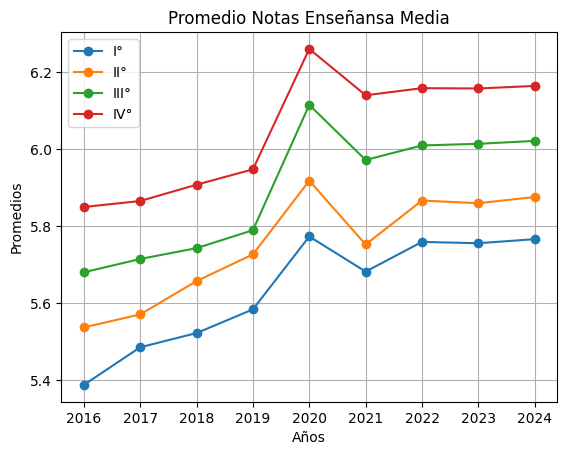

In [29]:
años1 = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
promedios1 = [pr16_1, pr17_1, pr18_1, pr19_1, pr20_1, pr21_1, pr22_1, pr23_1, pr24_1]

años2 = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
promedios2 = [pr16_2, pr17_2, pr18_2, pr19_2, pr20_2, pr21_2, pr22_2, pr23_2, pr24_2]

años3 = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
promedios3 = [pr16_3, pr17_3, pr18_3, pr19_3, pr20_3, pr21_3, pr22_3, pr23_3, pr24_3]

años4 = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
promedios4 = [pr16_4, pr17_4, pr18_4, pr19_4, pr20_4, pr21_4, pr22_4, pr23_4, pr24_4]

plt.plot(años1, promedios1, marker='o', label='I°')
plt.plot(años2, promedios2, marker='o', label='II°')
plt.plot(años3, promedios3, marker='o', label='III°')
plt.plot(años4, promedios4, marker='o', label='IV°')
plt.legend()
plt.ylabel("Promedios")
plt.xlabel("Años")
plt.title("Promedio Notas Enseñansa Media")
plt.grid(True)
plt.show()

Tablas: __Tipo de establecimiento__

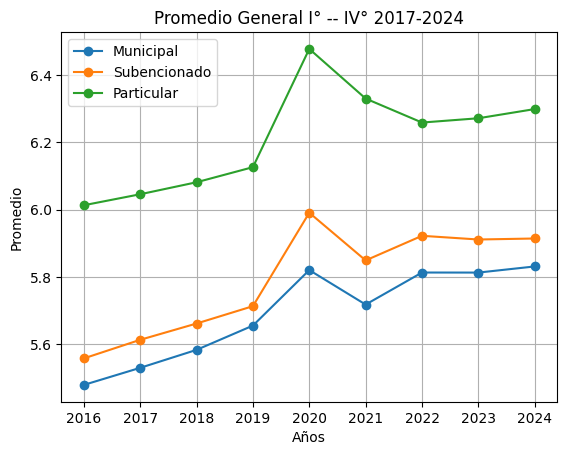

In [32]:
años_m = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
promedios_m = [pr16_m, pr17_m, pr18_m, pr19_m, pr20_m, pr21_m, pr22_m, pr23_m, pr24_m]

años_ps = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
promedios_ps = [pr16_ps, pr17_ps, pr18_ps, pr19_ps, pr20_ps, pr21_ps, pr22_ps, pr23_ps, pr24_ps]

años_pp = ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
promedios_pp = [pr16_pp, pr17_pp, pr18_pp, pr19_pp, pr20_pp, pr21_pp, pr22_pp, pr23_pp, pr24_pp]

plt.plot(años_m, promedios_m, marker='o', label='Municipal')
plt.plot(años_ps, promedios_ps, marker='o', label='Subencionado')
plt.plot(años_pp, promedios_pp, marker='o', label='Particular')
plt.title("Promedio General I° -- IV° 2017-2024")
plt.ylabel("Promedio")
plt.xlabel("Años")
plt.grid(True)
plt.legend(loc='upper left')
plt.show()


In [49]:
dt = df24_RM["NOM_COM_RBD"].value_counts()
dt = pd.DataFrame(dt)
dt.reset_index(inplace=True)
dt.columns = ['Comuna', 'Cantidad de Establecimientos']
dt.head()

,Comuna,Cantidad de Establecimientos
0,SANTIAGO,24096
1,MAIPÚ,23846
2,PUENTE ALTO,22506
3,LA FLORIDA,17214
4,SAN BERNARDO,12909


In [87]:
gdf = gpd.read_file('Comunas/comunas.shp')
gdf = gdf[gdf['codregion'] == 13]
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 52 entries, 26 to 328
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    52 non-null     int64   
 1   shape_leng  52 non-null     float64 
 2   dis_elec    52 non-null     int32   
 3   cir_sena    52 non-null     int32   
 4   cod_comuna  52 non-null     int32   
 5   codregion   52 non-null     int32   
 6   st_area_sh  52 non-null     float64 
 7   st_length_  52 non-null     float64 
 8   Region      52 non-null     object  
 9   Comuna      52 non-null     object  
 10  Provincia   52 non-null     object  
 11  geometry    52 non-null     geometry
dtypes: float64(3), geometry(1), int32(4), int64(1), object(3)
memory usage: 4.5+ KB


In [71]:
dt['Comuna'] = dt['Comuna'].str.lower()
gdf['Comuna'] = gdf['Comuna'].str.lower()
merged = pd.merge(dt, gdf, on='Comuna')
merged = gpd.GeoDataFrame(merged)
merged.head()

,Comuna,Cantidad de Establecimientos,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Provincia,geometry
0,santiago,24096,333,24644.018619,10,7,13101,13,3.337678e+07,29171.609500,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7864917.074 -3952801.626, -7864220...."
1,maipú,23846,320,61424.982526,8,7,13119,13,1.990876e+08,73734.913427,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7877529.505 -3956422.697, -7877529...."
2,puente alto,22506,292,48961.654840,12,7,13201,13,1.269446e+08,58874.136921,Región Metropolitana de Santiago,Cordillera,"POLYGON ((-7848546.332 -3968052.875, -7848478...."
3,la florida,17214,311,49696.426793,12,7,13110,13,1.025245e+08,59570.561221,Región Metropolitana de Santiago,Santiago,"POLYGON ((-7841285.109 -3960800.595, -7841150...."
4,san bernardo,12909,297,86349.611516,14,7,13401,13,2.227586e+08,103993.594041,Región Metropolitana de Santiago,Maipo,"POLYGON ((-7874973.895 -3983668.273, -7874938...."


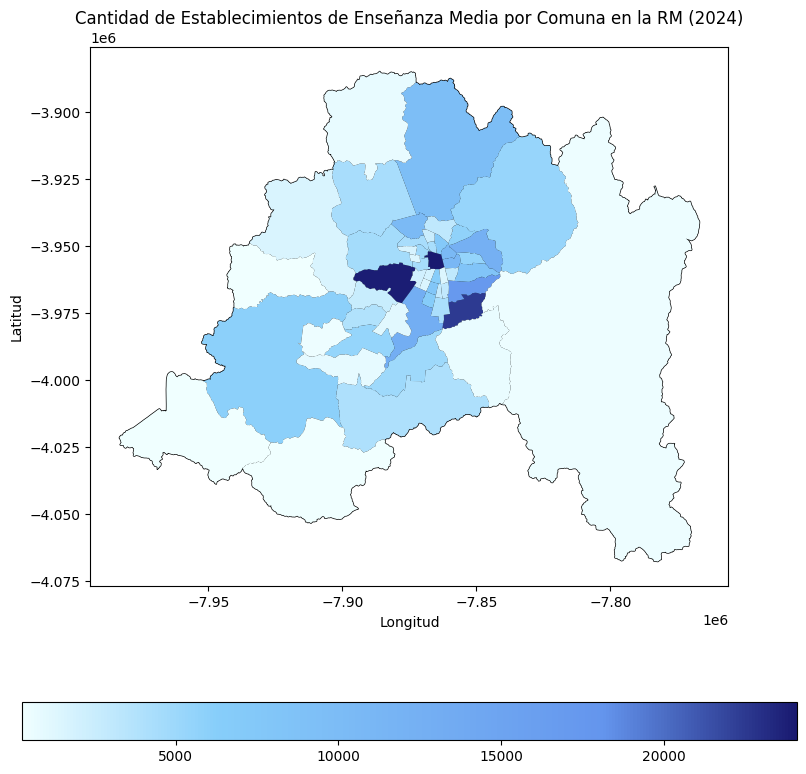

In [86]:
import matplotlib.colors as mcolors
colors = ["azure", "lightskyblue", "cornflowerblue", "midnightblue"]
positions = [0, 0.25,0.75, 1]

custom_cmap = mcolors.LinearSegmentedColormap.from_list("cyclic_cmap", list(zip(positions, colors)))

ax = gdf.plot(figsize=(10, 10), color='white', edgecolor='black')
merged.plot(column='Cantidad de Establecimientos', ax=ax, cmap=custom_cmap, legend=True, legend_kwds={'orientation': "horizontal"})
plt.title("Cantidad de Establecimientos de Enseñanza Media por Comuna en la RM (2024)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()